<a href="https://colab.research.google.com/github/Mestevam1976/imersao_dados_alura_4_edicao/blob/main/Imers%C3%A3o_de_Dados_Alura_M%C3%A1rcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imersão Dados

Antes de tudo temos que importar uma biblioteca chamada <b>Pandas</b>, ela é específica para trabalharmos com DataFrames (que são os dados organizados como uma tabela de Excel, por exemplo)

In [2]:
import pandas as pd
import numpy as np

Depois de importado a biblioteca Pandas, indicamos onde está o arquivo que queremos trabalhar, no caso, é um endereço na internet, logo, temos que atribuir esse endereço em uma variável, no caso, chamei ela de "caminho".

Depois, criamos outra variável e acionamos a biblioteca Pandas para fazer a leitura desse arquivo (que está no formato .csv (valores separados por vírgula), esse formato pode ser diverso: html, .json, pdf).

Após fazer a leitura, pedimos para exibir somente as 5 primeiras linhas desse DataFrame com o comando .head() - que é o cabeçalho do DataFrame.

In [3]:
caminho = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados = pd.read_csv(caminho)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Uma boa prática para saber como está o DataFrame, além da visualização dele como foi feita acima, podemos usar o comando .info(), que mostra como estão gravados os registros e em quais formatos eles se encontram.

Note na tabela abaixo que a tabela "Valor" possui Dtype = object. Com esse formato não conseguimos realizar operações matemáticas.

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [5]:
dados.Valor # Aqui é uma forma de exibir somente a coluna Valor e, quando exibimos uma única coluna chamamos ela de Serie. Duas ou mais colunas é um DataFrame.

0                                R$ 7.000.000
1                                R$ 3.700.000
2                                  R$ 380.000
3                                  R$ 685.000
4                                  R$ 540.000
                         ...                 
10003                              R$ 665.000
10004                            R$ 2.300.000
10005                            R$ 1.050.000
10006    R$ 2.200\n                      /Mês
10007                              R$ 270.000
Name: Valor, Length: 10008, dtype: object

A visualização padrão do DataFrame exibe as primeiras e as últimas linhas dos registros, note que o arquivo possui 10.008 registros (começa com o registro 0)

In [6]:
dados.Valor[10006] # Aqui estou chamando somente o registro numero 10.006, pois, na consulta acima ele mostra que está registrado diferente:

'R$ 2.200\n                      /Mês'

# Tratamento e Limpeza dos Dados:

<hr>

Para execução dos cálculos aritméticos é mandatório transformar os registros em valores numéricos e, antes de fazer isso, temos que remover todas as interferências para essa conversão, no caso, temos que remover o R cifrão (tem um espaço depois do $), temos que remover os pontos de milhares (.) e por fim, tratar os registros que adicionaram informações à mais do que os números, no exemplo do registro 10.006, além do 2.200, foi registrado "\n            /Mês".

In [7]:
dados["Valor"] = dados["Valor"].str.replace("R$ ","", regex=False) # Aqui removemos o R$ e o espaço a frente dele

In [8]:
dados.Valor = dados.Valor.str.replace(".", "", regex=False) # Aqui removemos os pontos de milhares (.)

In [9]:
dados.Valor.sample(30) # Aqui fazemos uma amostragem de 30 elementos para ver a formatação

2254                              1290000
3267                              1600000
1491                              6300000
3933                             12000000
8364                             32000000
9684                               290000
8112                               995000
6993                              3900000
2396                              3000000
736                               2250000
6699                               990000
1554                              3500000
5374                               585000
1029                              3800000
7387    30000\n                      /Mês
8671                               650000
8583                               900000
4592                             14500000
168                                688000
2505                              3850000
4357                              2000000
6331                              1700000
5330                              1200000
6541                              

In [10]:
dados.Valor = dados.Valor.str.replace("\n                      /Mês","", regex=False) # aqui removemos a string (texto) "\n                      /Mês"

In [11]:
dados.Valor = dados.Valor.str.replace("\n                      /Ano","", regex=False) # aqui removemos a string (texto) "\n                      /Ano"

In [12]:
dados.Valor = dados.Valor.str.replace("\n                      /Dia","", regex=False) # aqui removemos a string (texto) "\n                      /Dia"

In [13]:
dados.Valor = dados.Valor.astype(float) # Finalmente convertemos a coluna Valor de object para o formato Float (número decimal)

In [14]:
dados.info() # Após a conversão checamos o DataFrame com o comando .info() e verificamos que a coluna "Valor" agora é do tipo Float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        6574 non-null   object 
 1   Bairro     9996 non-null   object 
 2   Cidade     10008 non-null  object 
 3   Metragem   10008 non-null  int64  
 4   Quartos    10008 non-null  int64  
 5   Banheiros  10008 non-null  int64  
 6   Vagas      10008 non-null  int64  
 7   Valor      10008 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 625.6+ KB


In [15]:
dados.Valor.min() # Aqui checamos o menor valor

1650.0

In [16]:
dados.Valor.max() # AQui checamos o maior valor

65000000.0

In [17]:
dados.Valor.mean() # E finalmente realizamos a média dos valores da coluna "Valor"

2794169.56205036

In [18]:
dados["Bairro"] = dados["Bairro"].apply(lambda x:str(x).replace("Vila Água Funda", "Água Funda")) # renomeando o bairro 'Vila Água Funda' para 'Água Funda'

In [19]:
b = dados.Bairro.str.startswith('Jardim Trememb')

dados.Bairro[b] # Dois registros como Jardim Tremembe (sem acento) e 01 registro como Jardim Tremembé

1427    Jardim Tremembé
8453    Jardim Tremembe
9651    Jardim Tremembe
Name: Bairro, dtype: object

In [20]:
c = dados.Bairro.str.startswith('Trememb')

dados.Bairro[c] # 19 registros como Bairro Tremembé

51      Tremembé
310     Tremembé
1783    Tremembé
5315    Tremembé
6022    Tremembé
6087    Tremembé
6173    Tremembé
7756    Tremembé
8105    Tremembé
8292    Tremembé
8592    Tremembé
8845    Tremembé
8969    Tremembé
9066    Tremembé
9097    Tremembé
9200    Tremembé
9568    Tremembé
9695    Tremembé
9731    Tremembé
Name: Bairro, dtype: object

In [21]:
d = dados.Bairro.str.fullmatch('Vila Nova Caledônia')

dados.Bairro[d] # Cinco registros como Vila Nova Caledônia (com acento)

5303    Vila Nova Caledônia
5772    Vila Nova Caledônia
7752    Vila Nova Caledônia
7885    Vila Nova Caledônia
8588    Vila Nova Caledônia
Name: Bairro, dtype: object

In [22]:
e = dados.Bairro.str.fullmatch('Vila Nova Caledonia')

dados.Bairro[e] # Dois registros como Vila Nova Caledonia (sem acento) 

2286    Vila Nova Caledonia
2412    Vila Nova Caledonia
Name: Bairro, dtype: object

In [23]:
bairros_vazios = dados.Bairro == 'nan' # Observado que existem 12 registros sem o nome do Bairro

dados[bairros_vazios]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",nan,São Paulo,742,4,8,6,9800.0
7956,Rua Vergueiro,nan,São Paulo,103,3,2,2,640000.0
7996,"Rua Alvorada do Sul, 3773",nan,São Paulo,678,4,8,8,6895000.0
8126,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,550,3,5,6,4000000.0
8566,"Avenida Comendador Adibo Ares, 3773",nan,São Paulo,694,4,6,6,3890000.0
8619,"Rua Alvorada do Sul, 3773",nan,São Paulo,683,4,8,8,6895000.0
8739,"Rua Alvorada do Sul, 3773",nan,São Paulo,683,4,8,8,6895000.0
8868,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,555,3,5,6,4000000.0
8943,"Rua Santo Eufredo, 3773",nan,São Paulo,846,4,8,8,30000.0
8992,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,555,3,5,6,4000000.0


<hr>

#Desafios:

1 - Realizar a média da metragem para cada um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

<hr>

<b>DESAFIO # 1:</b>

Realizar a média da metragem para cada um dos bairros (Paulo)

In [24]:
dados.Metragem.mean() # Checando a Média geral

442.30065947242207

In [25]:
dados.groupby('Bairro').mean()['Metragem'].to_frame().reset_index() # Média das Metragens agrupadas por Bairro 

,Bairro,Metragem
0,Aclimação,253.056818
1,Alto da Boa Vista,418.875000
2,Alto da Lapa,294.337209
3,Alto da Mooca,270.050000
4,Alto de Pinheiros,433.444988
...,...,...
696,nan,621.333333
697,Água Branca,191.000000
698,Água Fria,165.416667
699,Água Funda,148.428571


<hr>

<b>DESAFIO # 2:</b>

Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [26]:
nome_do_bairro = 'Mooca' # Atribuindo o nome do bairro que se deseja realizar as consultas (válido para os dois métodos abaixo:)

In [27]:
# Método 1: utilizando o Método LOC do Pandas:

dados.loc[dados['Bairro'] == nome_do_bairro].head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0
109,Rua Timbó,Mooca,São Paulo,170,3,2,2,940000.0
247,NaN,Mooca,São Paulo,80,2,2,4,870000.0
2343,Rua Manuel Galvão,Mooca,São Paulo,106,3,3,2,450000.0
2441,"Rua Timbó, 130",Mooca,São Paulo,170,3,1,2,1000000.0


In [28]:
# Método 2: Através do Método Query do Pandas

dados.query('Bairro == @nome_do_bairro ').head() # O @ atribui a string a uma variável existente, no caso a variável nome_do_bairro

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0
109,Rua Timbó,Mooca,São Paulo,170,3,2,2,940000.0
247,NaN,Mooca,São Paulo,80,2,2,4,870000.0
2343,Rua Manuel Galvão,Mooca,São Paulo,106,3,3,2,450000.0
2441,"Rua Timbó, 130",Mooca,São Paulo,170,3,1,2,1000000.0


<hr>

<b>DESAFIO # 3</b>

 Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

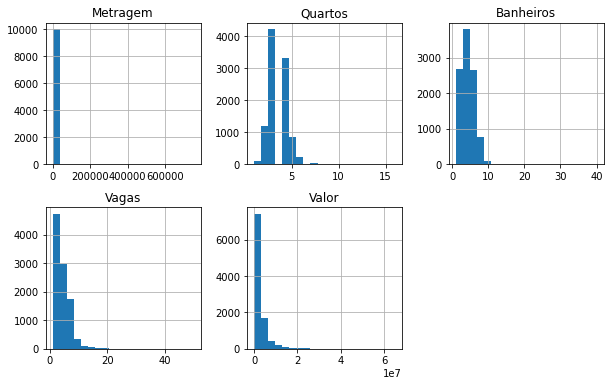

In [29]:
dados.hist(figsize=(10,6), layout=(2,3), bins=20)
print()

In [30]:
import seaborn as sns # importando a biblioteca gráfica Seaborn

sns.set_theme(style="darkgrid")

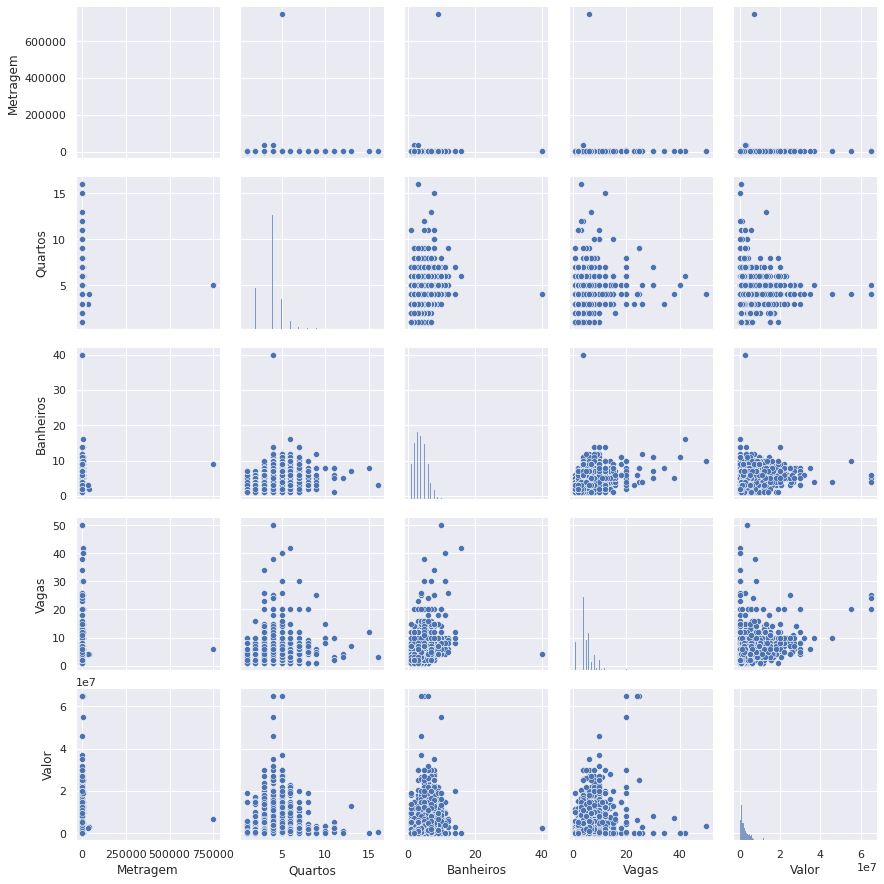

In [31]:
# Gráfico Pairplot do Seaborn - faz a comparação entre pares do dataset

ax = sns.pairplot(dados) # exibe um gráfico de comparação de pares

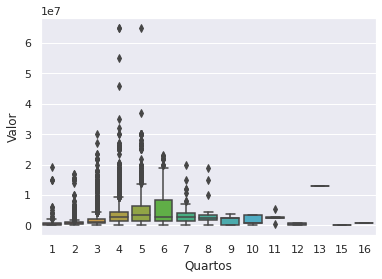

In [32]:
# Gráfico BoxPlot do Seaborn - excelente para visualizar os Outliers em uma distribuição

ax = sns.boxplot(data=dados, x='Quartos', y='Valor')

ax = sns.set(rc = {'figure.figsize':(15,10)})

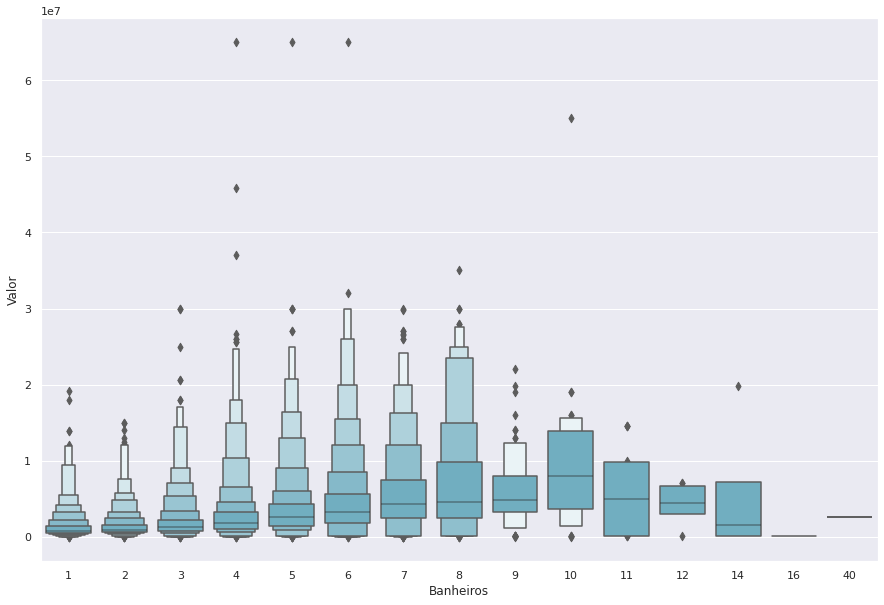

In [33]:
ax = sns.boxenplot(x="Banheiros", y="Valor",color="c",scale="linear", data=dados)

ax = sns.set(rc = {'figure.figsize':(15,6)})

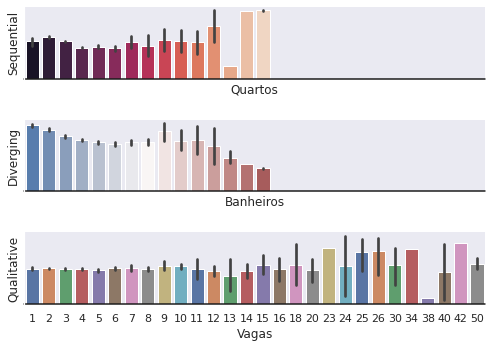

In [34]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

rs = np.random.RandomState(8)


y1 = np.arange(1,10009)
sns.barplot(x=dados.Quartos, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

y2 = y1 - 5.5
sns.barplot(x=dados.Banheiros, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=dados.Vagas, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

<hr>

<b>DESAFIO # 4</b>

 Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

In [45]:
dados.describe().T # Obtendo a contagem dos dados, média, desvio-padrão, quartis, mediana, valor mínimo e máximo:

,count,mean,std,min,25%,50%,75%,max
Metragem,10008.0,4.423007e+02,7.515379e+03,10.0,173.0,290.0,460.25,750000.0
Quartos,10008.0,3.483114e+00,1.064200e+00,1.0,3.0,3.0,4.00,16.0
Banheiros,10008.0,3.879097e+00,1.988467e+00,1.0,2.0,4.0,5.00,40.0
Vagas,10008.0,4.097222e+00,2.824014e+00,1.0,2.0,4.0,5.00,50.0
Valor,10008.0,2.794170e+06,3.866249e+06,1650.0,750000.0,1600000.0,3350000.00,65000000.0


<hr>

<b>DESAFIO # 5</b>

Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [46]:
ruas_sem_nome = dados.Rua.isnull() # localizando as ruas que estão sem nome (campos vazios ou NAN)

In [47]:
dados['Bairro'][ruas_sem_nome].to_frame() # filtrando os nomes dos Bairros que possuem ruas sem nome

,Bairro
3,Jardim Morumbi
11,Jardim Luzitânia
31,Parque da Lapa
56,Chácara Santo Antônio (Zona Sul)
57,Jardim Guedala
...,...
9963,Jardim Petrópolis
9989,Parque Alves de Lima
9991,Vila Formosa
9995,Jardim Leonor
